<a href="https://colab.research.google.com/github/javiervasquezufm/ELEMENTS-OF-MACHINE-LEARNING/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 10

En este laboratorio encontraremos el valor óptimo de k en k-mean clustering con una gráfica de distancia cuadrada media respecto a k

In [0]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

print("Todos los paquetes han sido importados:")

Todos los paquetes han sido importados:


Trabajaremos sobre la base de datos de casas de Wholesales costumers, que se encuentra en [Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Wholesale+customers).

1.   Enumera qué variables son continuas y qué variables son categóricas
2.   Despliega la estadística descriptiva de las variables continuas del dataset para explorarlo
3.   Convierte las variables categóricas en binarias usando pd.get_dummies.
4.   Estandariza las variables usando una escala estándar (StandardScaler). Explica por qué este paso es importante.
5.   En un rango de 1 a 15 para k, realiza el clustering sobre los datos y para cada k guarda el valor de la distancia cuadrada media.
6.   Haz una gráfica de k contra la distancia cuadrada media. ¿Qué criterio puedes usar para identificar el valor óptimo de k? ¿Qué pasa cuando k se aproxima a n, la cantidad de observaciones?
7.   Repite el clustering ahora usando el valor óptimo de k. Ubica la posición de cada centroide y comenta acerca de cada uno (por ejemplo, ¿qué valores para cada variable caracterizan a cada centroide?)



In [0]:
from google.colab import files

In [0]:
data = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [0]:
data1 = pd.read_csv("Wholesale customers data.csv")

In [0]:
data1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [0]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [0]:
data1.fillna(0)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [0]:
pd.value_counts(data1['Channel'])

1    298
2    142
Name: Channel, dtype: int64

In [0]:
pd.value_counts(data1['Channel'])/len(data1['Channel'])

1    0.677273
2    0.322727
Name: Channel, dtype: float64

In [0]:
pd.value_counts(data1['Region'])

3    316
1     77
2     47
Name: Region, dtype: int64

In [0]:
pd.value_counts(data1['Region'])/len(data1['Region'])

3    0.718182
1    0.175000
2    0.106818
Name: Region, dtype: float64

In [0]:
pd.crosstab(index=data1['Channel'],       
            columns=data1['Region'], margins=True)

Region,1,2,3,All
Channel,,,,
1,59,28,211,298
2,18,19,105,142
All,77,47,316,440


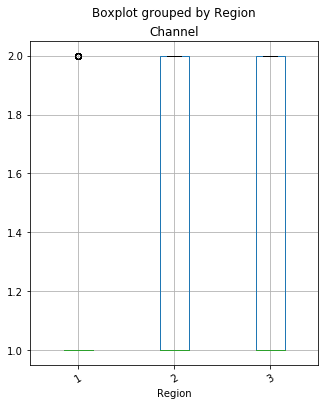

In [0]:
data1.boxplot('Channel','Region',rot = 30,figsize=(5,6))

In [0]:
data1 = pd.get_dummies(data1, columns=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], drop_first=True)

Estandarizar los datos nos ayuda a que todos los datos esten dentro de un mismo rango para poder hacer el modelo de la mejor manera y tambien ayuda a que los datos tengan mas relevancia entre si. Como tambien nos ayuda a que todo corra mas rapido

In [0]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1)
print(data1)
print(scaled_data)

     Channel_2  Region_2  Region_3  Fresh_9  Fresh_18  Fresh_23  Fresh_37  \
0            1         0         1        0         0         0         0   
1            1         0         1        0         0         0         0   
2            1         0         1        0         0         0         0   
3            0         0         1        0         0         0         0   
4            1         0         1        0         0         0         0   
5            1         0         1        0         0         0         0   
6            1         0         1        0         0         0         0   
7            1         0         1        0         0         0         0   
8            0         0         1        0         0         0         0   
9            1         0         1        0         0         0         0   
10           1         0         1        0         0         0         0   
11           1         0         1        0         0         0         0   

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
data1.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [0]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefae3a3240>,
      dtype=object)

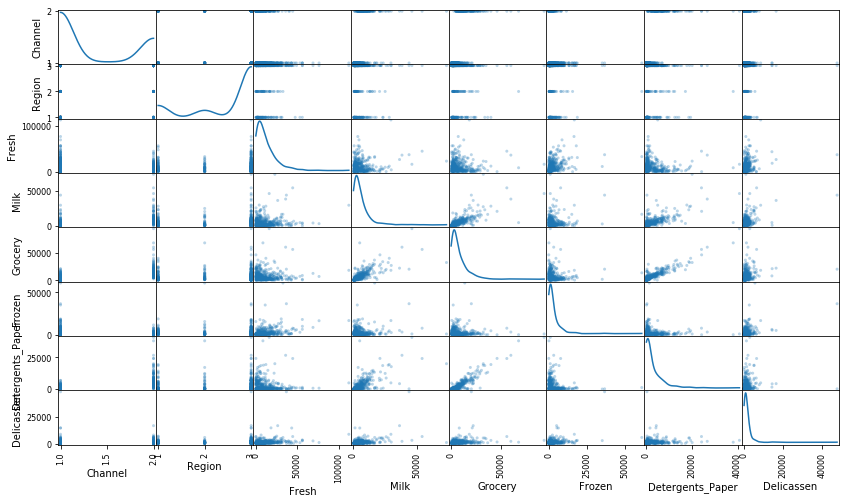

In [0]:
scatter_matrix(data1, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [0]:
import seaborn as sns

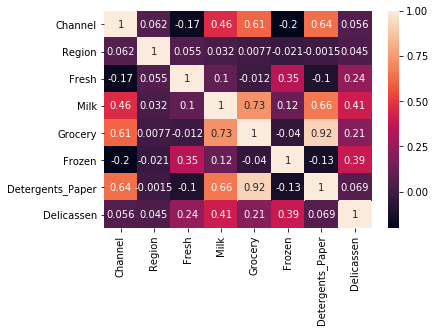

In [0]:
sns.heatmap(data1.corr(), annot=True)

In [0]:
data1["Region"].size

440

In [0]:
from sklearn.datasets.samples_generator import make_blobs
data1["Channel"], data1["Region"] = make_blobs(n_samples=500, centers=2,
                       cluster_std=0.04, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

ValueError: ignored

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

NameError: ignored

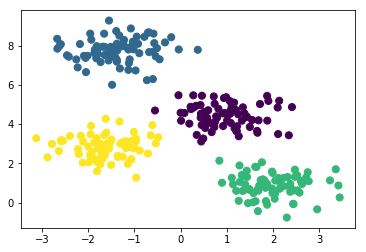

In [0]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

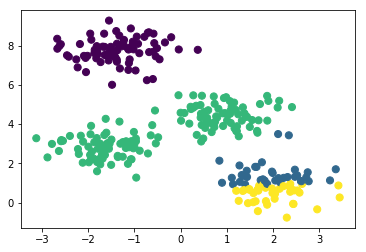

In [0]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [0]:
indices = [0,1,3]
samples = pd.DataFrame(data1.loc[indices], columns = data.keys()).reset_index(drop = True)

In [0]:
import numpy as np
log_data = np.log(data1)
log_samples = np.log(samples)

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=6)
pca.fit(data1)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
samples

,Wholesale customers data.csv
0,NaN
1,NaN
2,NaN


In [0]:
log_samples = np.log(samples)

In [0]:
log_samples

,Wholesale customers data.csv
0,NaN
1,NaN
2,NaN


In [0]:
pca_samples = pca.transform(log_samples)

ValueError: ignored